# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?"

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          |
|------------------------|:-------------------|
|Administrative          | Quantidade de acessos em páginas administrativas|
|Administrative_Duration | Tempo de acesso em páginas administrativas |
|Informational           | Quantidade de acessos em páginas informativas  |
|Informational_Duration  | Tempo de acesso em páginas informativas  |
|ProductRelated          | Quantidade de acessos em páginas de produtos |
|ProductRelated_Duration | Tempo de acesso em páginas de produtos |
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  |
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações |
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico |
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) |
|Month                   | Mês  |
|OperatingSystems        | Sistema operacional do visitante |
|Browser                 | Browser do visitante |
|Region                  | Região |
|TrafficType             | Tipo de tráfego                  |
|VisitorType             | Tipo de visitante: novo ou recorrente |
|Weekend                 | Indica final de semana |
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [6]:
df.describe(include=['float64', 'int64'])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


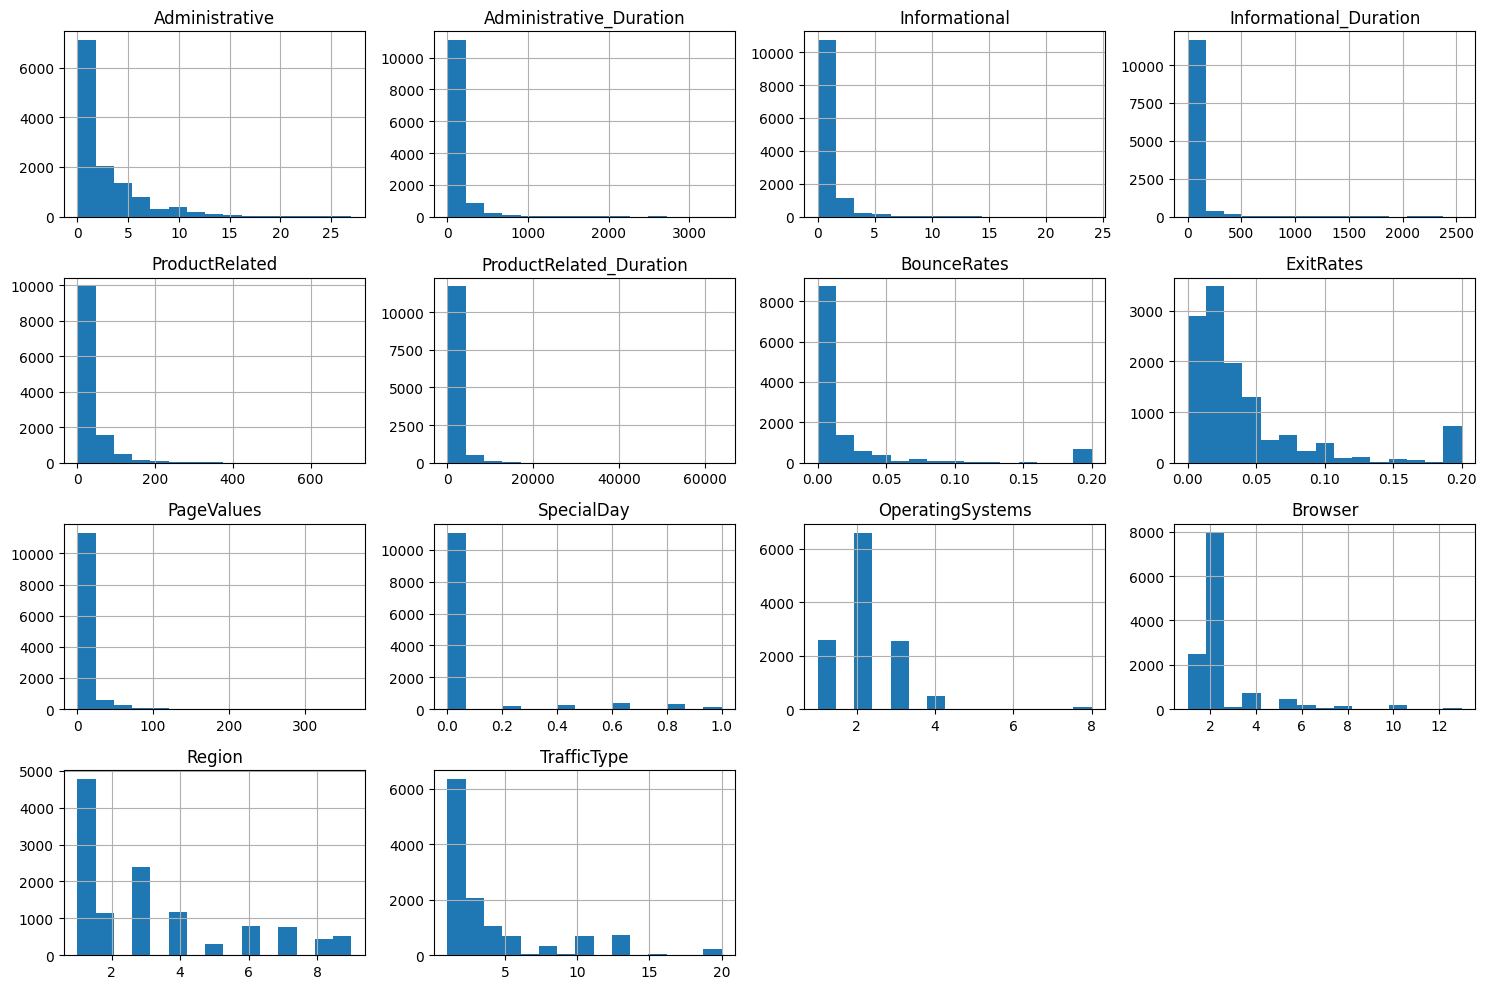

In [7]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[num_columns].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

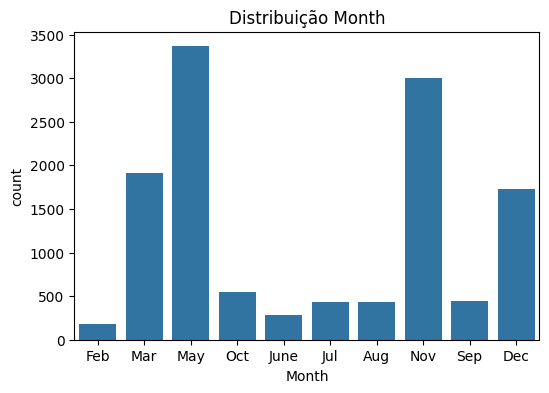

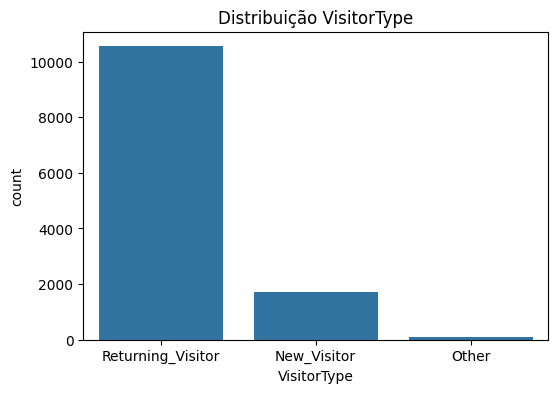

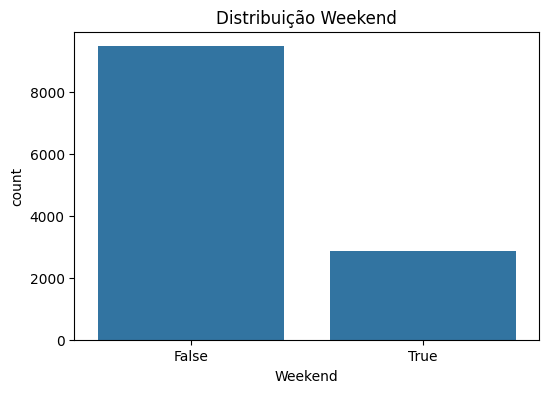

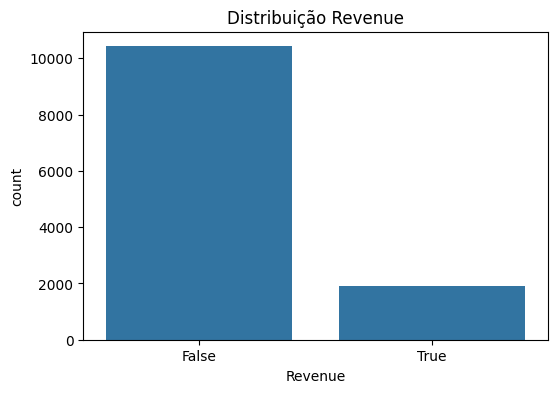

In [8]:
cat_columns = df.select_dtypes(include=['object', 'bool']).columns
for col in cat_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribuição {col}')
    plt.show()

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [9]:
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

group = df[['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Month']]
group['Month'] = group['Month'].map(month_mapping)

<ipython-input-9-7f2cdc867a43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Month'] = group['Month'].map(month_mapping)


In [10]:
group = pd.get_dummies(group)

for column in group.select_dtypes(include=['bool']).columns:
  group[column] = group[column].astype(int)

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa.

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [11]:
scaler = StandardScaler()
scaled = scaler.fit_transform(group)

In [12]:
Z = linkage(scaled, method='ward')

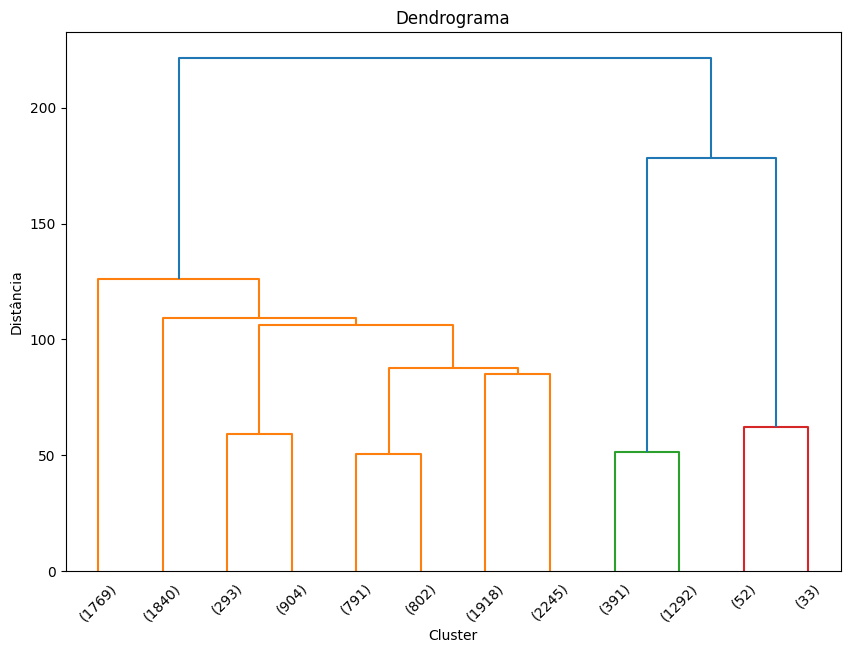

In [13]:
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10.)
plt.title('Dendrograma')
plt.xlabel('Cluster')
plt.ylabel('Distância')
plt.show()

In [14]:
cluster3 = fcluster(Z, 3, criterion='maxclust')
cluster4 = fcluster(Z, 4, criterion='maxclust')

In [15]:
group['cluster_3'] = cluster3
group['cluster_4'] = cluster4

In [16]:
group.drop(columns='cluster_4').groupby('cluster_3').mean()

,OperatingSystems,Browser,Region,TrafficType,Month,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
cluster_3,,,,,,,,
1,2.115319,2.314997,3.098372,4.026415,7.498012,0.001041,0.0,0.998959
2,1.991682,2.291147,3.266191,3.855021,8.415330,1.000000,0.0,0.000000
3,5.823529,8.894118,6.882353,13.682353,11.670588,0.000000,1.0,0.000000


In [17]:
group.drop(columns='cluster_3').groupby('cluster_4').mean()

,OperatingSystems,Browser,Region,TrafficType,Month,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
cluster_4,,,,,,,,
1,2.298474,1.947428,3.085924,11.656303,8.340871,0.000000,0.0,1.000000
2,2.078472,2.388946,3.100876,2.491414,7.328443,0.001251,0.0,0.998749
3,1.991682,2.291147,3.266191,3.855021,8.415330,1.000000,0.0,0.000000
4,5.823529,8.894118,6.882353,13.682353,11.670588,0.000000,1.0,0.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final.
- Se puder, sugira nomes para os grupos.

In [24]:
for column in df.select_dtypes(include=['bool']).columns:
    df[column] = df[column].astype(int)

In [26]:
df = pd.get_dummies(df)

In [27]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [30]:
linked = linkage(scaled, method='ward')

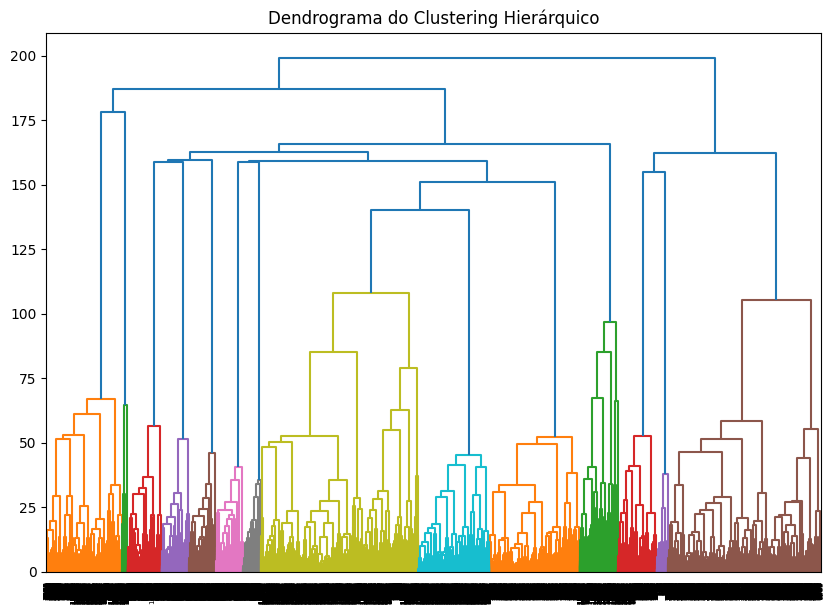

In [32]:
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma do Clustering Hierárquico')
plt.show()

In [35]:
agglomerative_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['Cluster_3'] = agglomerative_3.fit_predict(scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [37]:
agglomerative_5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
df['Cluster_5'] = agglomerative_5.fit_predict(scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [38]:
df.groupby('Cluster_3').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cluster_5
Cluster_3,,,,,,,,,,,,,,,,,,,,,
0,2.321263,77.159437,0.310478,17.840338,18.268875,671.172683,0.004455,0.021274,9.598903,0.025424,...,0.000770,0.167951,0.229584,0.318182,0.000000,0.000000,0.933744,0.065485,0.000770,2.065485
1,1.242274,34.984058,0.204265,7.009652,20.669963,730.478040,0.053492,0.075535,1.615895,0.215204,...,0.000000,0.058405,0.809642,0.044190,0.000000,0.000000,0.007108,0.000000,0.992892,1.000000
2,2.759492,100.453067,0.659954,48.640928,38.564392,1474.629530,0.012152,0.033228,7.045426,0.003592,...,0.036814,0.192406,0.057209,0.313238,0.070421,0.057465,0.058876,0.000000,0.941124,0.309389


In [39]:
df.groupby('Cluster_5').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cluster_3
Cluster_5,,,,,,,,,,,,,,,,,,,,,
0,2.369804,73.149918,0.432365,20.479538,33.190602,1232.642469,0.012537,0.034185,6.933262,0.000862,...,0.039900,0.201724,0.039900,0.296121,0.075212,0.061449,0.061171,0.0,0.938829,2.0
1,1.242274,34.984058,0.204265,7.009652,20.669963,730.478040,0.053492,0.075535,1.615895,0.215204,...,0.000000,0.058405,0.809642,0.044190,0.000000,0.000000,0.007108,0.0,0.992892,1.0
2,2.380874,78.172979,0.319868,18.271634,18.675185,678.233907,0.002066,0.018326,8.996762,0.027205,...,0.000000,0.179720,0.245672,0.322341,0.000000,0.000000,0.999176,0.0,0.000824,0.0
3,1.470588,62.695588,0.176471,11.685490,12.470588,570.404862,0.038551,0.063349,18.191812,0.000000,...,0.011765,0.000000,0.000000,0.258824,0.000000,0.000000,0.000000,1.0,0.000000,0.0
4,7.407960,426.143859,3.374793,384.569420,102.666667,4361.218128,0.007557,0.021807,8.383387,0.036153,...,0.000000,0.081260,0.263682,0.517413,0.013267,0.009950,0.031509,0.0,0.968491,2.0


In [40]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

In [41]:
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

Text(0.5, 1.0, 'Clustering com 3 Grupos')

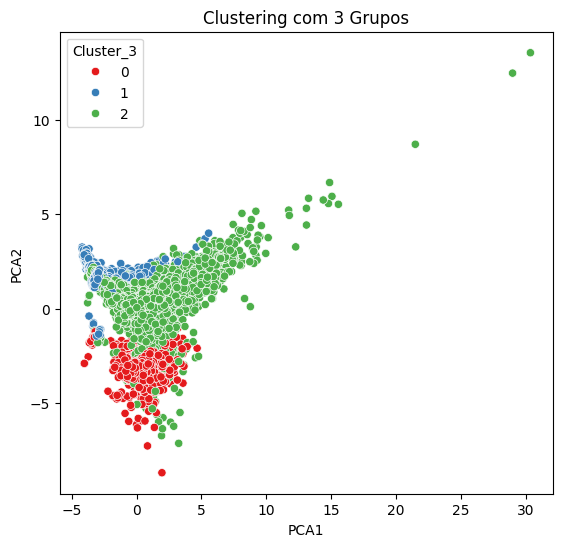

In [42]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_3', data=df, palette='Set1')
plt.title('Clustering com 3 Grupos')

Text(0.5, 1.0, 'Hierarchical Clustering com 5 Grupos')

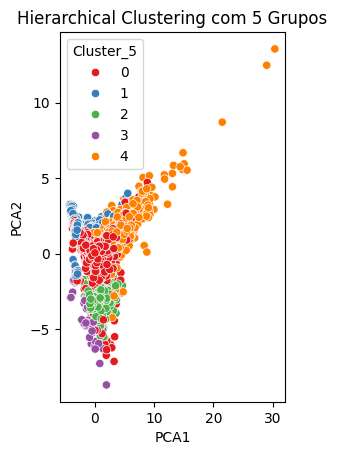

In [43]:
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_5', data=df, palette='Set1')
plt.title('Hierarchical Clustering com 5 Grupos')

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*).
- Qual grupo possui clientes mais propensos à compra?

In [51]:
cluster_analise = df.groupby('Cluster_3').agg({
    'BounceRates': ['mean', 'std', 'median'],
    'Revenue': ['mean', 'std', 'sum', 'count']
}).reset_index()

cluster_analise

Cluster_3 BounceRates                       Revenue                      
                   mean       std    median      mean       std   sum count
0         0    0.004455  0.022951  0.000000  0.241140  0.427940   313  1298
1         1    0.053492  0.075444  0.013333  0.014524  0.119656    47  3236
2         2    0.012152  0.026627  0.003030  0.198563  0.398944  1548  7796

In [53]:
cluster_analise = df.groupby('Cluster_5').agg({
    'BounceRates': ['mean', 'std', 'median'],
    'Revenue': ['mean', 'std', 'sum', 'count']
}).reset_index()

cluster_analise

Cluster_5 BounceRates                       Revenue                      
                   mean       std    median      mean       std   sum count
0         0    0.012537  0.027538  0.002667  0.198943  0.399233  1431  7193
1         1    0.053492  0.075444  0.013333  0.014524  0.119656    47  3236
2         2    0.002066  0.007072  0.000000  0.244847  0.430174   297  1213
3         3    0.038551  0.078438  0.000000  0.188235  0.393220    16    85
4         4    0.007557  0.009874  0.004790  0.194030  0.395780   117   603

### No agrupamento com 3 clusters, o grupo com com maior propensão à compra foi o grupo 2, com 5 clusters, o grupo com maior propensão à compra foi o grupo 4. Ambos tem uma taxa de rejeição menor e uma média de receita maior, e eles tendem a ficar mais tempo no site e gastam mais dinheiro em média.